1. Завантажити початковi данi.
2. Представити данi графiчно.
3. Iнiцiалiзувати параметри: швидкiсть навчання, кiлькiсть епох (=100) i додатково, якщо задано згiдно з варiантом, кiлькiсть пакетiв i/або параметр регуляризацiї.
4. Iнiцiалiзувати вектор параметрiв.
5. Реалiзувати функцiю, яка задає модель, наприклад:
• лiнiйну регресiю,
• полiномiальну регресiю,
• iншу криву, яку пiдiбрати вiдповiдно до заданих даних.
6. Задати функцiю втрат (одну згiдно з варiантом):
• MSE,
• MSE з регуляризацiєю за нормами L1 або L2.
7. Задати операцiю, яка буде викликатися на кожнiй iтерацiї алгоритма навчання:
• алгоритм градiєнтного спуску,
• алгоритм мiнi-пакетного градiєнтного спуску,
• алгоритм градiєнтного спуску з моментом,
• алгоритм Adagrad,
• алгоритм Adadelta,
• алгоритм Adam.
8. Виконати навчання моделi.
9. Виводити значення функцiї втрат через кожнi 10 епох.
10. Зберегти контрольнi точки через регулярнi iнтервали пiд час навчання. В кiнцi навчання зберегти результуючу модель. Вiдновити останню контрольну точку при запуску, якщо навчання було перервано.
11. Налаштувати гiперпараметр швидкiсть навчання i додатково, якщо задано згiдно варiанту, розмiр мiнi-пакета. Подивитися на форму кривої навчання.
12. Дослiдити рiзнi значення параметра регуляризацiї i пiдiбрати найкраще з них, якщо згiдно з варiантом задано регуляризовану функцiю втрат. В цьому випадку данi мають бути попередньо розбитi на навчальний та перевiрочний набори.
13. Побудувати графiк з початковими даними та лiнiєю регресiї.

#Полiномiальна регресiя, алгоритм Adadelta, MSE з регуляризацiєю за нормою L2.

In [16]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib_inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import optuna
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

NUM_EPOCHS = 100
DEGREE_1 = 5
DEGREE_2 = 3


In [85]:
nRowsRead = 1000
df = pd.read_csv("/content/Time Series/infy_stock.csv", index_col='Date', parse_dates=True)
columns_to_delete = ['Symbol', 'Series', 'Prev Close', 'VWAP', 'Last']
df = df.drop(columns=columns_to_delete)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 248 rows and 9 columns


In [86]:
df.head(5)

,Open,High,Low,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.40,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479,3.557162e+14,62463,1317720,0.7270


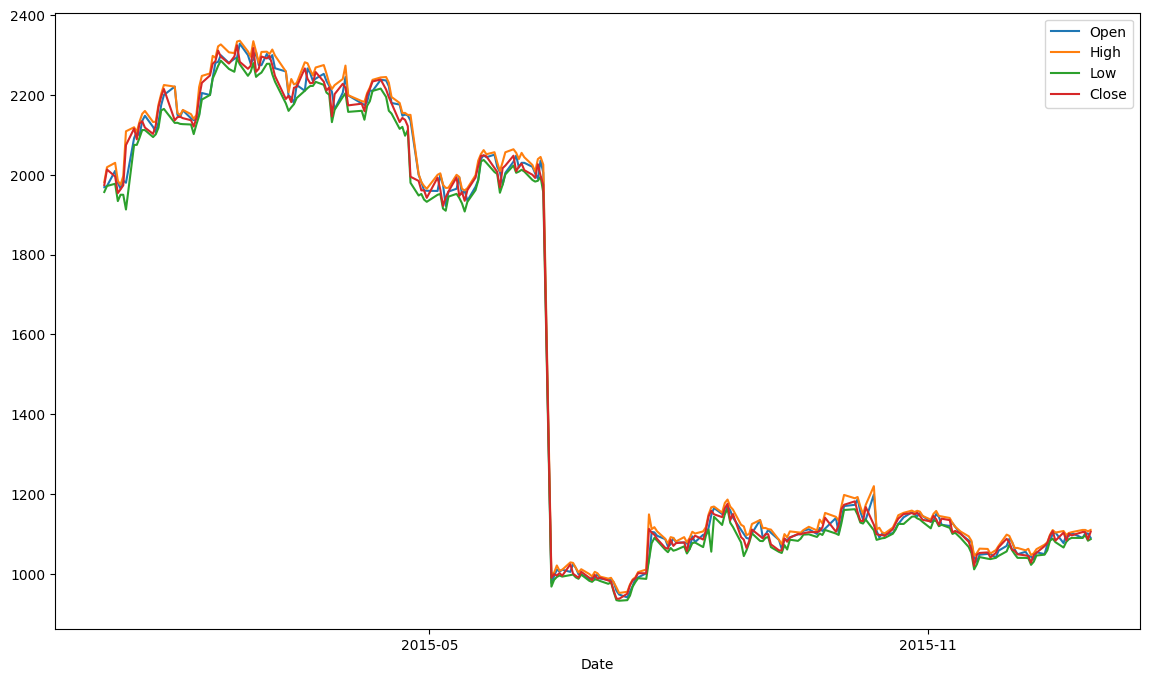

In [87]:
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df.Open, label='Open')
ax.plot(df.High, label='High')
ax.plot(df.Low, label='Low')
ax.plot(df.Close, label='Close')

myFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.set_xlabel('Date')


plt.legend()
plt.show()

<Axes: xlabel='Date', ylabel='Volume'>

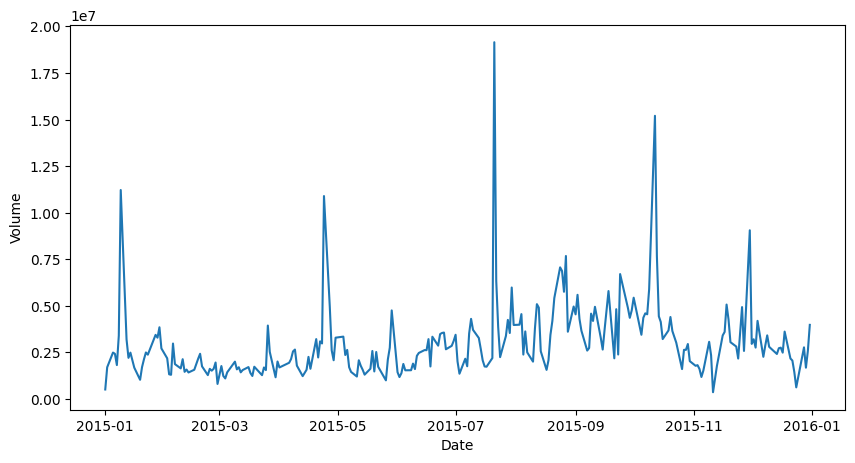

In [88]:

plt.figure(figsize=(10, 5))
sns.lineplot(df.Volume)

<Axes: >

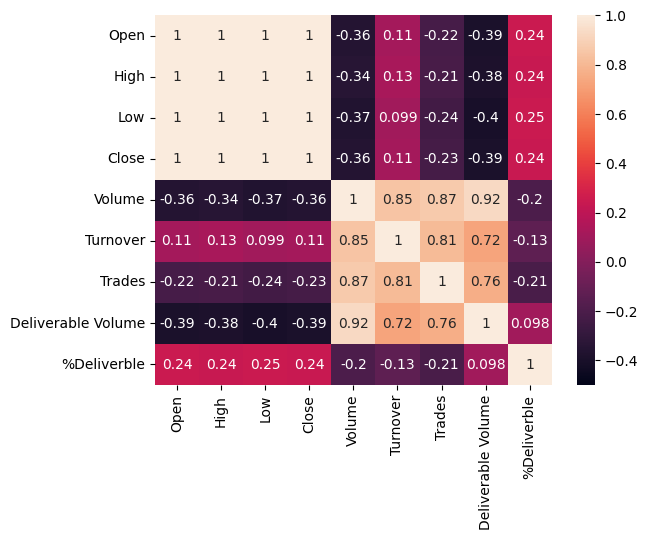

In [89]:
corr = df.corr()

sns.heatmap(corr, annot=True, vmin=-0.5, vmax=1)

In [67]:
X_data = np.array(df.reset_index().index)

y_data = df.Open.values

In [68]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=17)

poly = PolynomialFeatures(degree=DEGREE_2)

X_train = poly.fit_transform(X_train.reshape(-1, 1))
X_train_val = poly.transform(X_train_val.reshape(-1, 1))
X_test = poly.transform(X_test.reshape(-1, 1))
X_val = poly.transform(X_val.reshape(-1, 1))
X = poly.transform(X_data.reshape(-1, 1))

y_stdscaler = StandardScaler()

y_train = y_stdscaler.fit_transform(y_train.reshape(-1, 1))
y_train_val = y_stdscaler.transform(y_train_val.reshape(-1, 1))
y_test = y_stdscaler.transform(y_test.reshape(-1, 1))
y_val = y_stdscaler.transform(y_val.reshape(-1, 1))
y = y_stdscaler.transform(y_data.reshape(-1, 1))

x_stdscaler = StandardScaler()

X_train = x_stdscaler.fit_transform(X_train)
X_train_val = x_stdscaler.transform(X_train_val)
X_test = x_stdscaler.transform(X_test)
X_val = x_stdscaler.transform(X_val)
X = x_stdscaler.transform(X)

In [69]:
X_tf = tf.constant(X, dtype=tf.float32)
y_tf = tf.constant(y, dtype=tf.float32)

X_tf_train = tf.constant(X_train, dtype=tf.float32)
X_tf_train_val = tf.constant(X_train_val, dtype=tf.float32)
X_tf_test = tf.constant(X_test, dtype=tf.float32)
X_tf_val = tf.constant(X_val, dtype=tf.float32)

y_tf_train = tf.constant(y_train, dtype=tf.float32)
y_tf_train_val = tf.constant(y_train_val, dtype=tf.float32)
y_tf_test = tf.constant(y_test, dtype=tf.float32)
y_tf_val = tf.constant(y_val, dtype=tf.float32)

In [80]:
def objective(trial):
    
    c_lambda_1 = trial.suggest_float("lambda_1", 1e-5, 1, log=True)
    c_lambda_2 = trial.suggest_float("lambda_2", 1e-5, 1, log=True)
    lrng_rate = trial.suggest_float("lrng_rate", 1e-5, 1, log=True)
    batch_size = trial.suggest_int("batch_size", 2, 32, 2)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(DEGREE_2 + 1,), kernel_regularizer=tf.keras.regularizers.l2(c_lambda_1)),
        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(c_lambda_2)),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=lrng_rate),
            loss='mean_squared_error',
            metrics = [tfa.metrics.RSquare(), tf.keras.metrics.MeanSquaredError()])

    model.fit(X_tf_train, y_tf_train,
                    epochs=NUM_EPOCHS,
                    verbose=0, 
                    validation_data=(X_tf_val, y_tf_val))

    score = model.evaluate(X_tf_val, y_tf_val, verbose=0)
    return score[0]


За допомогою optuna.create_study() було створено об'єкт study. За допомогою методу study.optimize() була запущена оптимізація з використанням вказаної цільової функції objective. 


In [81]:
study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=15, timeout=600, n_jobs=-1)

[I 2023-06-02 15:38:08,123] A new study created in memory with name: no-name-5f76581e-b289-4774-98cf-47ba3017db21
[I 2023-06-02 15:38:21,234] Trial 0 finished with value: 2.3316423892974854 and parameters: {'lambda_1': 9.8263722987374e-05, 'lambda_2': 0.1428589124862942, 'lrng_rate': 4.703197041502444e-05, 'batch_size': 12}. Best is trial 0 with value: 2.3316423892974854.
[I 2023-06-02 15:38:31,626] Trial 1 finished with value: 1.387808918952942 and parameters: {'lambda_1': 0.0019719995939742117, 'lambda_2': 9.014734993437898e-05, 'lrng_rate': 0.00021661246198474905, 'batch_size': 24}. Best is trial 1 with value: 1.387808918952942.
[I 2023-06-02 15:38:32,582] Trial 2 finished with value: 0.6989579200744629 and parameters: {'lambda_1': 0.025128856533609006, 'lambda_2': 4.260506883797773e-05, 'lrng_rate': 0.02263092421885144, 'batch_size': 22}. Best is trial 2 with value: 0.6989579200744629.
[I 2023-06-02 15:38:44,513] Trial 4 finished with value: 1.1419377326965332 and parameters: {'lam

Використовуючи оптимізацію з бібліотекою Optuna, було знайдено набір оптимальних параметрів для використання в моделі. Ці параметри допомагають зменшити помилку прогнозування і покращити точність моделі. Протягом оптимізації було випробовано різні комбінації значень параметрів, що дозволило знайти оптимальну комбінацію, що найкраще відповідає даному набору даних.

In [82]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 15
Best trial:
  Value: 0.07681204378604889
  Params: 
    lambda_1: 1.0457509335050151e-05
    lambda_2: 1.175043664692881e-05
    lrng_rate: 0.8272471044465052
    batch_size: 2


In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(DEGREE_2 + 1,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00005)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.2),
              loss='mean_squared_error',
              metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanSquaredError()])

history = model.fit(X_tf_train_val, y_tf_train_val,
                    epochs=NUM_EPOCHS,
                    callbacks=[PrintLossCallback(),
                               tf.keras.callbacks.ModelCheckpoint(filepath="model_numpy_isprr2_2",
                                                                  save_best_only=True, verbose=0,
                                                                  save_weights_only=True)],
                    verbose=0, batch_size=24,
                    validation_data=(X_tf_test, y_tf_test))

y_pred_test = model.predict(X_tf_test)
y_pred_full = model.predict(X_tf)

Epoch 0: Loss = 0.7457, R_square = 0.2691, MSE = 0.7405,                   
 Val Loss = 0.48207393288612366, Val R Square = 0.46630507707595825, Val MSE = 0.4769356846809387 

Epoch 10: Loss = 0.0987, R_square = 0.9080, MSE = 0.0932,                   
 Val Loss = 0.10162652283906937, Val R Square = 0.892675518989563, Val MSE = 0.09591037034988403 

Epoch 20: Loss = 0.0758, R_square = 0.9315, MSE = 0.0694,                   
 Val Loss = 0.04507489129900932, Val R Square = 0.9568413496017456, Val MSE = 0.03856867924332619 

Epoch 30: Loss = 0.0954, R_square = 0.9125, MSE = 0.0886,                   
 Val Loss = 0.10134941339492798, Val R Square = 0.8944692611694336, Val MSE = 0.09430737793445587 

Epoch 40: Loss = 0.0632, R_square = 0.9446, MSE = 0.0561,                   
 Val Loss = 0.048253193497657776, Val R Square = 0.9539319276809692, Val MSE = 0.04116867482662201 

Epoch 50: Loss = 0.0865, R_square = 0.9220, MSE = 0.0791,                   
 Val Loss = 0.06964529305696487, Val R 

1. Помилка (Loss) під час тренування зменшується з кожною епохою, що свідчить про здатність моделі адаптуватися до навчальних даних. Метрики R_square та MSE також покращуються з кожною епохою, що вказує на те, що модель все краще відповідає тренувальним даним.
2. Загалом, модель досягає добрих результатів як на тренувальному, так і на валідаційному наборі даних. Зменшення помилки та покращення метрик свідчать про те, що модель здатна відтворювати та прогнозувати цільові значення з високою точністю. 

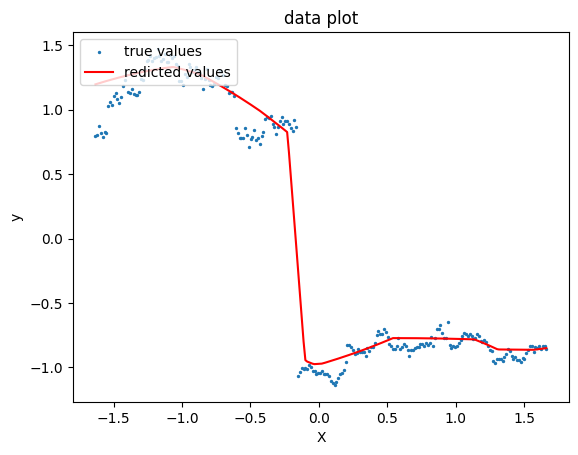

In [76]:
plt.scatter(x=X[:, 1], y=y, s=2, label='true values')
plt.plot(X[:, 1], y_pred_full, label='redicted values', c='red')
plt.title('data plot')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')

Прогнозовані значення добре узгоджуються з реальними, графік показує близьку залежність між цими значеннями.

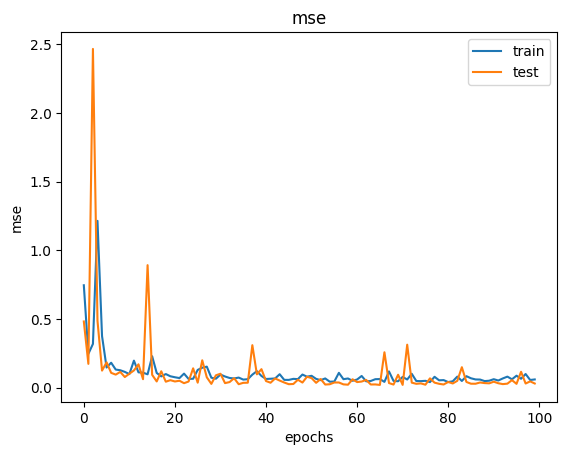

In [84]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.xlabel("epochs")
plt.ylabel("mse")
plt.title('mse')
plt.legend()
plt.show()

Як видно, значення функції втрат рівномірно спадали як для навчального датасету так і для тестового.
Створена модель зробила досить  гарну криву, що пристосувалася до нашого датасету.